In [4]:
from robust import *

In [2]:
graph = prep_graph(file="datasets/karate.gml", file_format="gml")

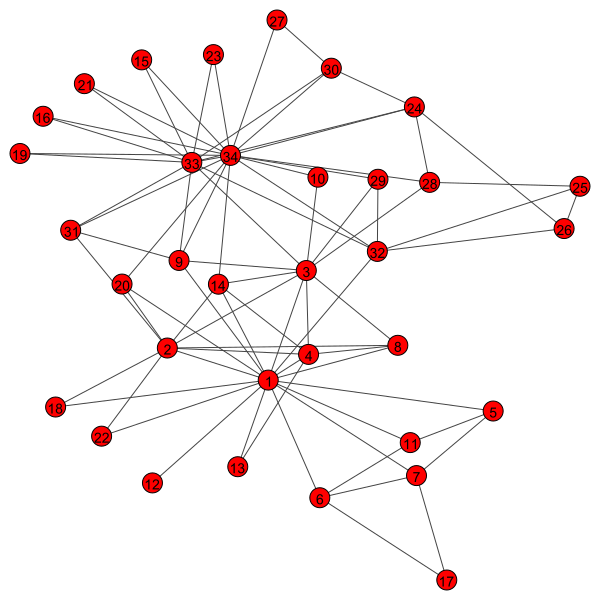

In [3]:
layout_1 = graph.layout_kamada_kawai()
plot = ig.plot(graph, layout=layout_1)
plot.save("__report__/base_graph.png")
plot

In [5]:
graph_random = random(graph.copy())

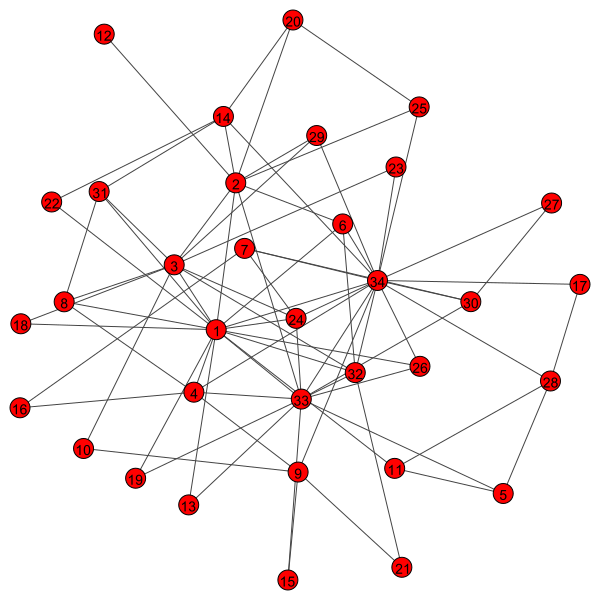

In [6]:
layout_2 = graph_random.layout_kamada_kawai()
plot = ig.plot(graph_random, layout=layout_2)
plot.save("__report__/random_graph.png")
plot

In [6]:
base_communities = method_community(graph=graph, method="optimal")
null_communities = method_community(graph=graph_random, method="optimal")

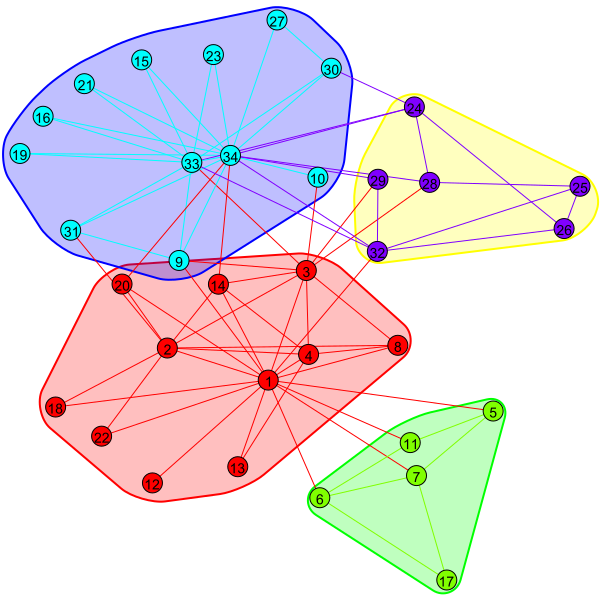

In [100]:
# Create a color dictionary
num_communities = max(base_communities.membership) + 1
palette = ig.RainbowPalette(n=num_communities)
color_dict = {i: palette.get(i) for i in range(num_communities)}

# Plot the graph with the communities
visual_style_1 = {}

# Set the layout as the calculated layout
visual_style_1["layout"] = layout_1

# Set the vertex color based on the communities
visual_style_1["vertex_color"] = [color_dict[base_communities.membership[v]] for v in range(len(graph.vs))]

# Set the edge color based on the source vertex's community membership
visual_style_1["edge_color"] = [color_dict[base_communities.membership[graph.es[e].source]] for e in range(len(graph.es))]

plot = ig.plot(base_communities, mark_groups=True, **visual_style_1)
plot.save("__report__/base_communities.png")
plot

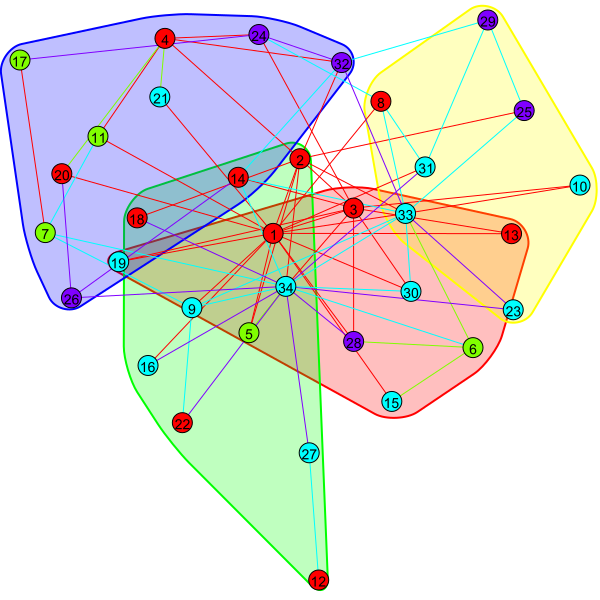

In [102]:
# Plot the graph with the communities
visual_style_2 = {}

# Set the layout as the calculated layout
visual_style_2["layout"] = layout_2

# Set the vertex color based on the communities
visual_style_2["vertex_color"] = [color_dict[base_communities.membership[v]] for v in range(len(graph.vs))]

# Set the edge color based on the source vertex's community membership
visual_style_2["edge_color"] = [color_dict[base_communities.membership[graph.es[e].source]] for e in range(len(graph.es))]

plot = ig.plot(null_communities, mark_groups=True, **visual_style_2)
plot.save("__report__/null_communities.png")
plot

In [103]:
base_membership = base_communities.membership #* base_membership = membership_communities(graph=graph, method="optimal")
null_membership = null_communities.membership #* null_membership = membership_communities(graph=graph_random, method="optimal")
print("Base Membership: ", base_membership)
print("Null Membership: ", null_membership)

Base Membership:  [0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]
Null Membership:  [0, 1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 1, 0, 3, 0, 3, 2, 3, 1]


0.5586115365125517


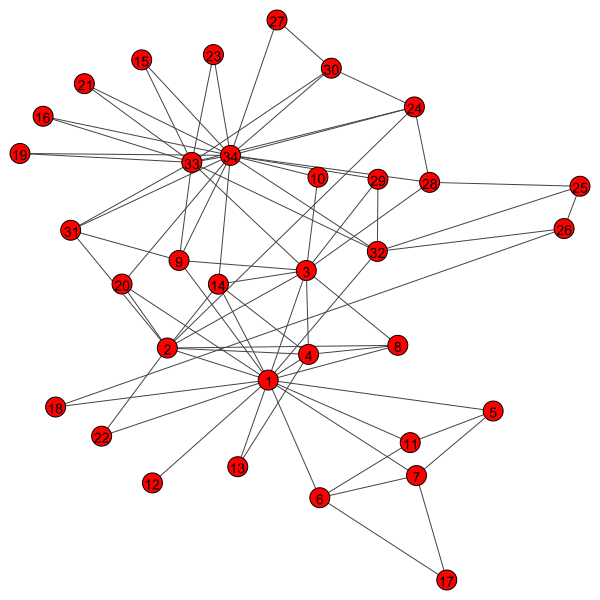

In [110]:
rewire_compl_test = rewire_compl(data=graph, number=1, community=base_membership, method="optimal", measure="vi")
print(rewire_compl_test['Measure'])
rewire_test_communities = method_community(graph=rewire_compl_test['graph_rewire'], method="optimal")
plot = ig.plot(rewire_compl_test['graph_rewire'], layout=layout_1)
plot.save("__report__/rewire_graph.png")
plot

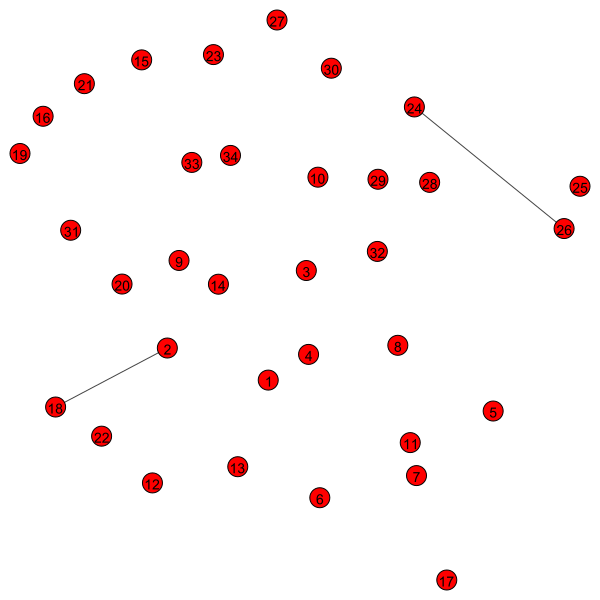

In [111]:
nx_graph = graph.to_networkx()
nx_rewire_graph = rewire_compl_test['graph_rewire'].to_networkx()
nx_difference_graph = nx.difference(nx_graph, nx_rewire_graph)
difference_graph = ig.Graph.from_networkx(nx_difference_graph)
plot = ig.plot(difference_graph, layout=layout_1)
plot.save("__report__/difference_graph.png")
plot

In [9]:
methods = ['louvain', 'walktrap', 'leadingeigen', 'fastgreedy', 'labelprop', 'infomap', 'leiden']

KeyboardInterrupt: 

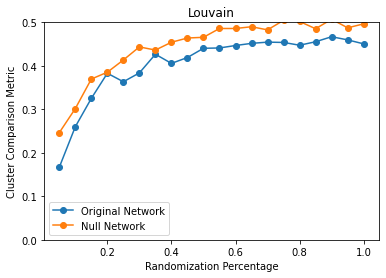

<Figure size 432x288 with 0 Axes>

In [7]:
output_1 = robin_robust(graph=graph, graph_random=graph_random, method="louvain")
plot_1 = plot_robin(graph, output_1["Mean"], output_1["MeanRandom"], legend=("Original Network", "Null Network"), title="Louvain", save=True, path="__report__/robust_louvain.png")

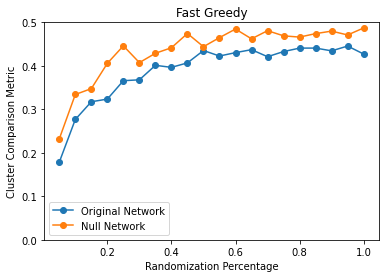

<Figure size 432x288 with 0 Axes>

In [9]:
output_2 = robin_robust(graph=graph, graph_random=graph_random, method="fastgreedy")
plot_2 = plot_robin(graph, output_2["Mean"], output_2["MeanRandom"], legend=("Original Network", "Null Network"), title="Fast Greedy", save=True, path="__report__/robust_fastgreedy.png")

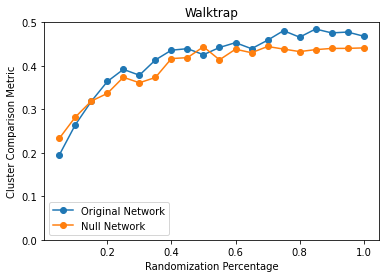

<Figure size 432x288 with 0 Axes>

In [12]:
output_3 = robin_robust(graph=graph, graph_random=graph_random, method="walktrap")
plot_3 = plot_robin(graph, output_3["Mean"], output_3["MeanRandom"], legend=("Original Network", "Null Network"), title="Walktrap", save=True, path="__report__/robust_walktrap.png")

In [14]:
#robust_output = robin_robust(graph=graph, graph_random=graph_random, measure="vi", method="louvain", type="independent")
#plot_robin(graph, robust_output["Mean"], robust_output["MeanRandom"], legend=("real data", "null model"))

In [5]:
graph1 = prep_graph(file="datasets/celegans_metabolic.net", file_format="net")
graph2 = prep_graph(file="datasets/football.gml", file_format="gml")

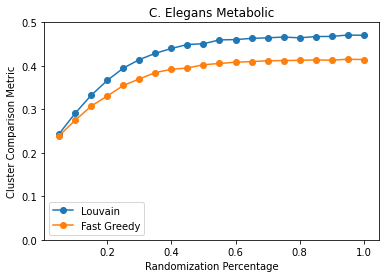

In [14]:
compare_output1 = robin_compare(graph=graph1, method1="louvain", method2="fastgreedy")
plot_robin(graph1, compare_output1["Mean1"], compare_output1["Mean2"], legend=("Louvain", "Fast Greedy"), title="C. Elegans Metabolic")

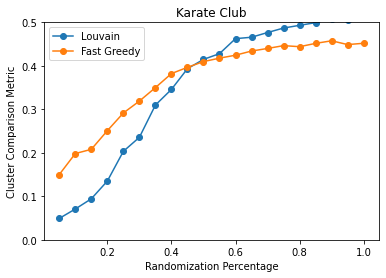

In [17]:
compare_output2 = robin_compare(graph=graph2, method1="louvain", method2="fastgreedy")
plot_robin(graph2, compare_output2["Mean1"], compare_output2["Mean2"], legend=("Louvain", "Fast Greedy"), title="Karate Club")

In [6]:
print(graph1.density())
print(graph2.density())

0.019779640157064994
0.0935163996948894


In [7]:
print(graph1.degree())
print(graph2.degree())

[7, 3, 6, 6, 2, 23, 10, 4, 4, 7, 5, 4, 7, 7, 4, 4, 4, 6, 4, 4, 4, 4, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 6, 4, 2, 6, 4, 4, 7, 5, 5, 6, 4, 6, 7, 5, 5, 5, 6, 5, 4, 5, 6, 3, 3, 5, 4, 7, 6, 7, 6, 10, 6, 5, 3, 4, 3, 10, 5, 8, 5, 3, 6, 7, 5, 3, 6, 6, 5, 8, 8, 8, 8, 8, 7, 6, 5, 9, 35, 6, 3, 4, 7, 6, 3, 7, 4, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 9, 8, 6, 5, 5, 3, 4, 4, 7, 5, 4, 5, 3, 4, 7, 4, 8, 10, 4, 10, 23, 5, 5, 3, 5, 4, 3, 17, 10, 5, 1, 4, 6, 6, 3, 11, 5, 104, 38, 123, 2, 10, 7, 3, 7, 64, 16, 57, 3, 11, 7, 12, 5, 5, 6, 4, 10, 3, 6, 9, 6, 5, 6, 5, 6, 33, 30, 5, 24, 4, 4, 3, 3, 3, 9, 16, 18, 9, 237, 13, 15, 3, 4, 5, 2, 12, 3, 5, 7, 8, 24, 7, 8, 6, 15, 4, 6, 64, 7, 11, 26, 2, 8, 11, 6, 3, 3, 8, 8, 11, 6, 3, 23, 7, 6, 3, 5, 3, 5, 75, 75, 59, 59, 61, 2, 28, 3, 4, 4, 3, 21, 5, 5, 3, 1, 15, 9, 12, 12, 3, 8, 6, 4, 3, 3, 3, 3, 5, 3, 5, 3, 6, 3, 5, 2, 3, 3, 2, 4, 6, 3, 6, 6, 6, 10, 12, 4, 4, 6, 6, 3, 3, 6, 3, 9, 3, 3, 19, 7, 5, 5, 5, 5, 5, 5, 10, 3, 21, 3, 7, 36, 9, 13, 4, 8, 5, 8, 3, 10, 3, 3, 6, 4, 12, 6, 3, 

In [8]:
print(graph1.average_path_length())
print(graph2.average_path_length())

2.6637851882240327
2.5081617086193746


In [9]:
print(graph1.transitivity_avglocal_undirected())
print(graph2.transitivity_avglocal_undirected())

0.6551404490982031
0.40321601104209814


In [10]:
print(graph1.assortativity_degree())
print(graph2.assortativity_degree())

-0.2258208879683293
0.16244224957448422


In [12]:
print(graph1.diameter())
print(graph2.diameter())

7
4
